# E7 - Decision Trees - Bagging

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [104]:
# Librerías

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegressionCV

# Parte 1 - Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [15]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('Dataset/bikeshare.csv', index_col='datetime', parse_dates=True)

# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

# create "hour" as its own feature
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [16]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [17]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [18]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

<AxesSubplot:xlabel='hour'>

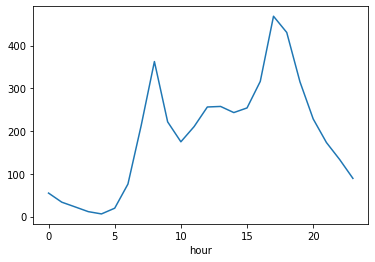

In [19]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

In [20]:
# hourly rental trend for "workingday=0"


In [21]:
# hourly rental trend for "workingday=1"


In [22]:
# combine the two plots


Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

# Parte 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [23]:
df = pd.read_csv('Dataset/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [24]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

y.mean()

0.5

In [25]:
# train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

### Árbol de Decisión

In [42]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

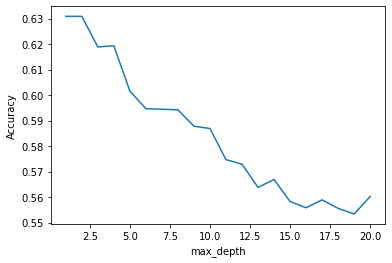

In [43]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [44]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [45]:
# max_depth=2 was best, so fit a tree using that parameter
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [55]:
# compute feature importances
feature_cols = X.columns[X.columns.str.startswith('C') == False]

pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance',ascending=False).head(10)

,feature,importance
26,kw_avg_avg,0.604184
24,kw_min_avg,0.074742
29,self_reference_avg_sharess,0.068279
25,kw_max_avg,0.067060
5,n_non_stop_unique_tokens,0.032695
23,kw_avg_max,0.030906
2,n_tokens_content,0.030439
27,self_reference_min_shares,0.028225
39,LDA_01,0.023698
42,LDA_04,0.018517


In [57]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [58]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[523, 221],
       [302, 454]])

In [59]:
# metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6513333333333333
Precision: 0.6725925925925926
Recall: 0.6005291005291006


### Regresión Logistica

In [60]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[468, 276],
       [303, 453]])

In [62]:
# metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.614
Precision: 0.6213991769547325
Recall: 0.5992063492063492


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

### 300 bagged samples

In [95]:
# set a seed for reproducibility
np.random.seed(123)

# model with B=300
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=300, 
                          bootstrap=True, oob_score=True, random_state=1)

# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([0.8       , 0.65      , 0.54      , ..., 0.55666667, 0.46333333,
       0.25666667])

In [94]:
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.4675921299594338

### 100 Decision Trees where max_depth=None

In [ ]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = 100
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred[i] = treereg.predict(X_test)

### 100 Decision Trees where max_depth=2

In [ ]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = 100
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=2, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred[i] = treereg.predict(X_test)

### 100 logistic regression

In [110]:
np.random.seed(123) 
n_estimators = 100
seeds = np.random.randint(1, 10000, size=n_estimators)
n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2420,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
1225,1,0,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5863,1,1,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
86,1,1,0,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0


In [111]:
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

lr.coef_

array([[0.03602428, 0.03508518, 0.0359676 , 0.03464416, 0.0344194 ,
        0.03573111, 0.03517911, 0.03476381, 0.03445624, 0.03458429,
        0.03532029, 0.03385623, 0.03476415, 0.03475334, 0.03564478,
        0.03483283, 0.03550462, 0.03539194, 0.03485006, 0.03433781,
        0.03490194, 0.03557252, 0.0345772 , 0.03474136, 0.03379438,
        0.03378481, 0.03508328, 0.0342939 , 0.0351193 , 0.03504985,
        0.03465061, 0.03566445, 0.0342035 , 0.03470091, 0.03491283,
        0.03596356, 0.03430122, 0.03482103, 0.03408704, 0.03511806,
        0.03485212, 0.03497144, 0.03489776, 0.03506659, 0.03402496,
        0.03561899, 0.03435921, 0.03426174, 0.03394084, 0.03430635,
        0.03380421, 0.03549426, 0.03420201, 0.03569458, 0.03523483,
        0.03479482, 0.03462391, 0.03483381, 0.03506083, 0.0347417 ,
        0.03443761, 0.03513182, 0.03438216, 0.03444892, 0.03450201,
        0.03517708, 0.03504204, 0.03597869, 0.03478215, 0.03478758,
        0.03444474, 0.03530984, 0.03547186, 0.03

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

# Exercise 7.11

Estimate the probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score